In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.api as smg

In [12]:
import pickle
prtest = np.array(pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/porous_rock_images_test.pkl', 'rb')))
ftest = np.array(pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/flux_test.pkl', 'rb')))
ft = np.array(pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/flux_train.pkl', 'rb')))
prt = np.array(pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/porous_rock_images_train.pkl', 'rb')))
ntest, ytest, xtest = prtest.shape
nt=ntest
yt=ytest
xt=xtest
n, y, x = prt.shape

In [4]:
%store -r MEAN
%store -r FLIPH0
%store -r FLIPH1
%store -r CUBEH0
%store -r CUBEH1
%store -r MSR500H0
%store -r MSR500H1
%store -r MSR1000H0
%store -r MSR1000H1
%store -r MSR1500H0
%store -r MSR1500H1
%store -r MSRPROPH0
%store -r MSRPROPH1


In [84]:
VARIABLES = np.vstack((MEAN, FLIPH0, FLIPH1, CUBEH0,BESPOKECUBEH0, CUBEH1 , MSR500H0, MSR500H1, MSR1000H0, MSR1000H1, MSR1500H0, MSR1500H1, MSRPROPH0, MSRPROPH1))

In [85]:
CORR = np.corrcoef(VARIABLES)
CORR

array([[ 1.        ,  0.97822331,  0.96186541,  0.66473627,  0.53794472,
        -0.61128513,  0.59306411,  0.22909931,  0.61596466, -0.00521285,
         0.67170354,  0.28991142,  0.96021454,  0.92812594],
       [ 0.97822331,  1.        ,  0.97735017,  0.64557296,  0.52691771,
        -0.58912938,  0.59548625,  0.22496602,  0.62162827,  0.00806768,
         0.66906121,  0.28999965,  0.94427505,  0.9082311 ],
       [ 0.96186541,  0.97735017,  1.        ,  0.58781077,  0.51980742,
        -0.63821659,  0.52479099,  0.20245771,  0.53450823,  0.00802888,
         0.58900292,  0.29779076,  0.90179576,  0.89249793],
       [ 0.66473627,  0.64557296,  0.58781077,  1.        ,  0.54006723,
        -0.27418877,  0.51106463,  0.20865504,  0.52983951,  0.00801044,
         0.58822494,  0.20399445,  0.68014077,  0.6103588 ],
       [ 0.53794472,  0.52691771,  0.51980742,  0.54006723,  1.        ,
        -0.3894253 ,  0.28841672,  0.12052003,  0.30693496,  0.01534897,
         0.34924667,  0.22

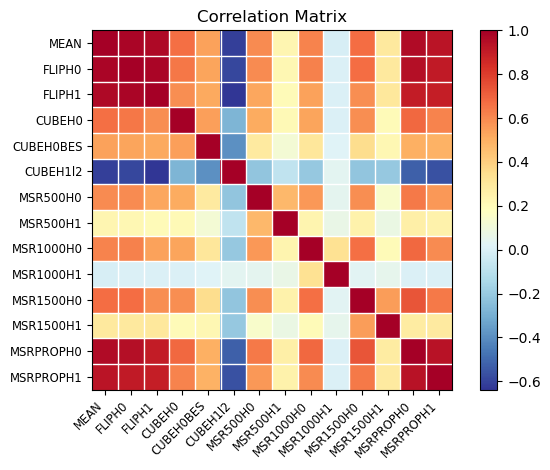

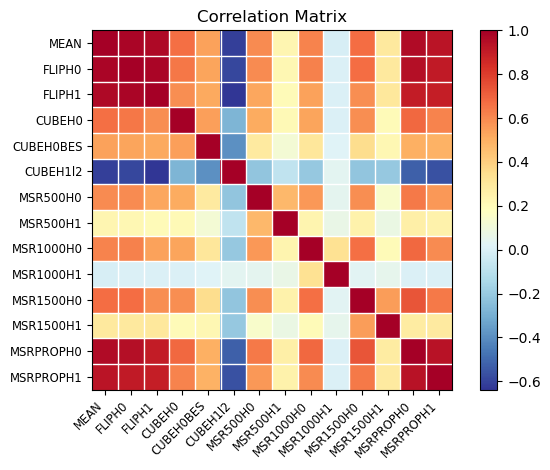

In [87]:
smg.plot_corr(CORR, xnames = ("MEAN", "FLIPH0", "FLIPH1", "CUBEH0", "CUBEH0BES", "CUBEH1l2" , "MSR500H0", "MSR500H1", "MSR1000H0", "MSR1000H1", "MSR1500H0", "MSR1500H1", "MSRPROPH0", "MSRPROPH1"))

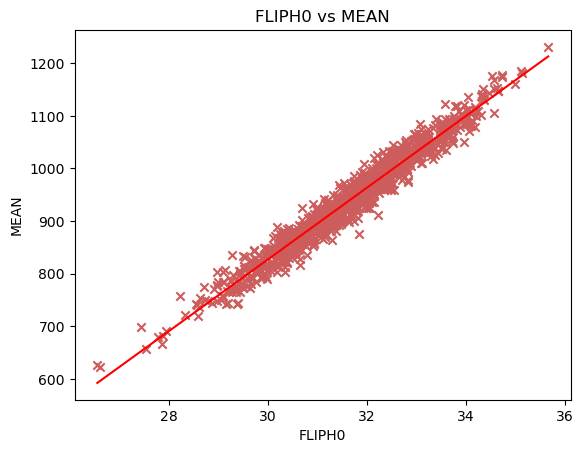

y =  68.17090311385454 x + -1217.6117681665544


In [7]:
import numpy.polynomial.polynomial as npl
import matplotlib.pyplot as plt
_ = plt.scatter(FLIPH0,MEAN, marker='x',color='indianred')
_ = plt.title('FLIPH0 vs MEAN')
_ = plt.xlabel('FLIPH0')
_ = plt.ylabel('MEAN')

#linear regression using polynomial fit
c, m  = npl.polyfit(FLIPH0, MEAN, 1)
a = min(FLIPH0)
b = max(FLIPH0)
r = [a,b]
_ = plt.plot([a,b], np.array(m) * r + c, 'r')
plt.show()
print("y = ", m, "x +", c)

In [45]:
%store -r CUBEH0TEST
%store -r MSR1500H0TEST
%store -r MSR1000H0TEST
%store -r MSR500H0TEST
%store -r MEANTEST
%store -r FLIPH1TEST

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression as LR

In [16]:
# normalised mean square error - normalise, then mean square error s = simulated, o = observed
def nmse(s, o):
    s = np.array(s)
    o = np.array(o)
    mean = o.mean()
    std = o.std()
    onorm = (o - mean)/std
    snorm = (s - mean)/std
    return np.dot(onorm-snorm,onorm-snorm)

# r squared
def rsq(s, o):
    s = np.array(s)
    o = np.array(o)
    mean = o.mean()
    ssres = np.dot(s - o, s - o)
    sstot = np.dot(o-mean,o-mean)
    return 1 - ssres/sstot


In [17]:
pers1diff_sum_01 = np.array([CUBEH0,MSR1500H0]).T
pers1diff_sum_01test = np.array([CUBEH0TEST,MSR1500H0TEST]).T
ytest = LR().fit(pers1diff_sum_01,np.array(ft)).predict(pers1diff_sum_01test)
print('results on the training set linear regression, L2 sum cube h0 and msr1500 h0')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum cube h0 and msr1500 h0
nmse =  110.84816152158241
rsq =  0.44575919239208794


In [19]:
pers1diff_sum_01 = np.array([CUBEH0,MSR1500H0,MSR1000H0,MSR500H0]).T
pers1diff_sum_01test = np.array([CUBEH0TEST,MSR1500H0TEST,MSR1000H0TEST,MSR500H0TEST]).T
ytest = LR().fit(pers1diff_sum_01,np.array(ft)).predict(pers1diff_sum_01test)
print('results on the training set linear regression, L2 sum cube h0 and msr1500 h0')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))


results on the training set linear regression, L2 sum cube h0 and msr1500 h0
nmse =  105.9766529487293
rsq =  0.47011673525635345


In [21]:
pers1diff_sum_01 = np.array([CUBEH0,MSR1500H0,MSR1000H0,MSR500H0,MEAN]).T
pers1diff_sum_01test = np.array([CUBEH0TEST,MSR1500H0TEST,MSR1000H0TEST,MSR500H0TEST,MEANTEST]).T
ytest = LR().fit(pers1diff_sum_01,np.array(ft)).predict(pers1diff_sum_01test)
print('results on the training set linear regression, L2 sum cube h0 and msr1500 h0')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))


results on the training set linear regression, L2 sum cube h0 and msr1500 h0
nmse =  23.0172500953675
rsq =  0.8849137495231625


In [22]:
pers1diff_sum_01 = np.array([CUBEH0,MSR1500H0,MEAN]).T
pers1diff_sum_01test = np.array([CUBEH0TEST,MSR1500H0TEST,MEANTEST]).T
ytest = LR().fit(pers1diff_sum_01,np.array(ft)).predict(pers1diff_sum_01test)
print('results on the training set linear regression, L2 sum cube h0 and msr1500 h0')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum cube h0 and msr1500 h0
nmse =  23.83919475955677
rsq =  0.8808040262022161


In [27]:
%store -r FLIP
%store -r FLIPTEST

In [28]:
#sum of just the first bars [0,1]

i = FLIP.shape[0]
pers1diff_sum_0 = np.zeros(i)
for j in range(i): 
    C = FLIP[j,:,:]
    CH = C[np.where( C[:,2]== 0, C[:,1]== 1, C[:,0]==0)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    pers1diff_sum_0[j] = diff_sumC

itest = FLIPTEST.shape[0]
pers1diff_sum_0test = np.zeros(itest)
for j in range(itest): 
    C = FLIPTEST[j,:,:]
    CH = C[np.where( C[:,2]== 0, C[:,1]== 1, C[:,0]==0)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    pers1diff_sum_0test[j] = diff_sumC


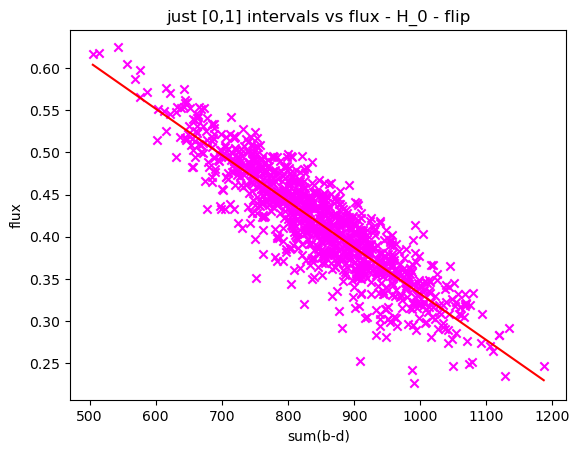

In [30]:
_ = plt.scatter(pers1diff_sum_0,ft, marker='x',color='magenta')
_ = plt.title('just [0,1] intervals vs flux - H_0 - flip')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_0, ft, 1)
r = [min(pers1diff_sum_0),max(pers1diff_sum_0)]
_ = plt.plot([min(pers1diff_sum_0),max(pers1diff_sum_0)], np.array(m) * r + c, 'r')
plt.show()

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression as LR
ytest = LR().fit(pers1diff_sum_0.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_0test.reshape(-1,1))
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

nmse =  28.98406971116144
rsq =  0.8550796514441927


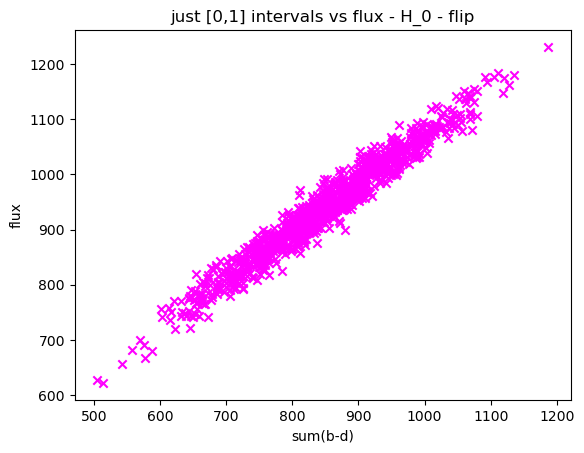

In [33]:
_ = plt.scatter(pers1diff_sum_0,MEAN, marker='x',color='magenta')
_ = plt.title('just [0,1] intervals vs flux - H_0 - flip')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

In [39]:
#sum of just the bars [0,1] and [0,1.41]

i = FLIP.shape[0]
pers1diff_sum_0 = np.zeros(i)
for j in range(i): 
    C = FLIP[j,:,:]
    CH = C[np.where( C[:,2]== 0, C[:,1] < 2, C[:,0]==0)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    pers1diff_sum_0[j] = diff_sumC
FLIPJUST01 = pers1diff_sum_0

itest = FLIPTEST.shape[0]
pers1diff_sum_0test = np.zeros(itest)
for j in range(itest): 
    C = FLIPTEST[j,:,:]
    CH = C[np.where( C[:,2]== 0, C[:,1] < 2, C[:,0]==0)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    pers1diff_sum_0test[j] = diff_sumC

    FLIPJUST01TEST = pers1diff_sum_0test

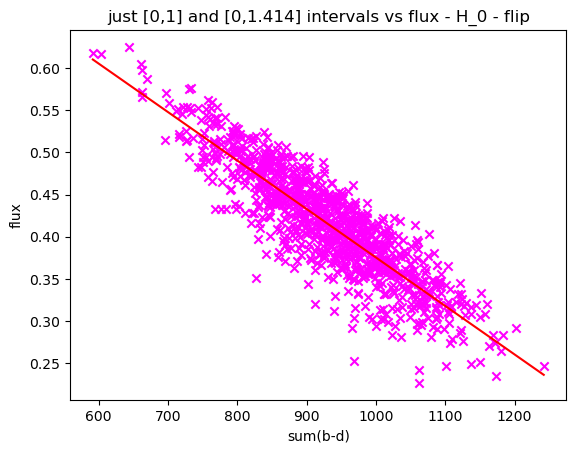

In [35]:
_ = plt.scatter(pers1diff_sum_0,ft, marker='x',color='magenta')
_ = plt.title('just [0,1] and [0,1.414] intervals vs flux - H_0 - flip')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_0, ft, 1)
r = [min(pers1diff_sum_0),max(pers1diff_sum_0)]
_ = plt.plot([min(pers1diff_sum_0),max(pers1diff_sum_0)], np.array(m) * r + c, 'r')
plt.show()

In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression as LR
ytest = LR().fit(pers1diff_sum_0.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_0test.reshape(-1,1))
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))


nmse =  31.48564782167089
rsq =  0.8425717608916455


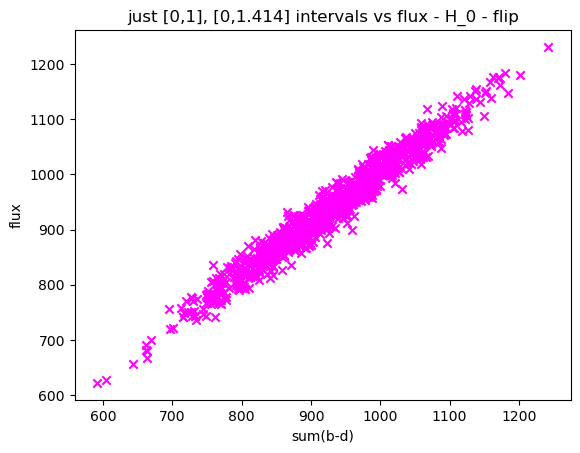

In [37]:
_ = plt.scatter(pers1diff_sum_0,MEAN, marker='x',color='magenta')
_ = plt.title('just [0,1], [0,1.414] intervals vs flux - H_0 - flip')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

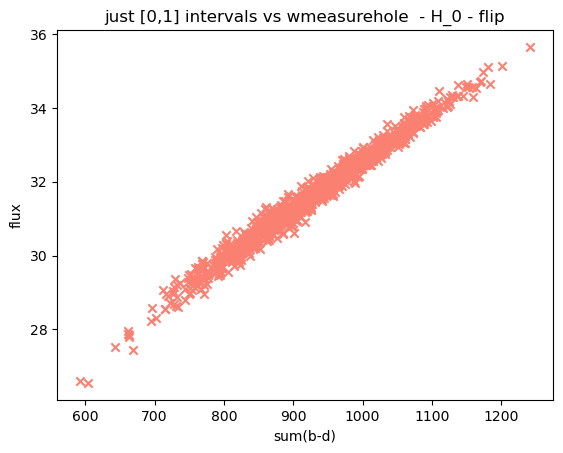

In [42]:
_ = plt.scatter(FLIPJUST01,FLIPH0, marker='x',color='salmon')
_ = plt.title('just [0,1] intervals vs wmeasurehole  - H_0 - flip')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

# warning ****** this is l2 norm vs normal som

In [58]:
%store -r MSRPROPH0TEST
%store -r CUBEH1TEST

In [60]:
pers1diff_sum_0_L2_addmsr = np.array([FLIPH1, CUBEH1, MSR500H0, MSR1000H0, MSR1500H0, MSRPROPH0,MEAN]).T
pers1diff_sum_0_L2_addmsrtest = np.array([FLIPH1TEST, CUBEH1TEST, MSR500H0TEST, MSR1000H0TEST, MSR1500H0TEST, MSRPROPH0TEST,MEANTEST]).T
ytest = LR().fit(pers1diff_sum_0_L2_addmsr,np.array(ft)).predict(pers1diff_sum_0_L2_addmsrtest)
print('results on the training set linear regression, L2 sum H1 and msr, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum H1 and msr, flip method
nmse =  21.09111315808838
rsq =  0.8945444342095581


In [61]:
pers1diff_sum_0_L2_addmsr = np.array([FLIPH1, CUBEH1, MEAN]).T
pers1diff_sum_0_L2_addmsrtest = np.array([FLIPH1TEST, CUBEH1TEST,MEANTEST]).T
ytest = LR().fit(pers1diff_sum_0_L2_addmsr,np.array(ft)).predict(pers1diff_sum_0_L2_addmsrtest)
print('results on the training set linear regression, L2 sum H1 and msr, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum H1 and msr, flip method
nmse =  22.270801761869013
rsq =  0.8886459911906549


In [65]:
pers1diff_sum_0_L2_addmsr = np.array([MSRPROPH0, CUBEH1, MEAN]).T
pers1diff_sum_0_L2_addmsrtest = np.array([MSRPROPH0TEST, CUBEH1TEST,MEANTEST]).T
ytest = LR().fit(pers1diff_sum_0_L2_addmsr,np.array(ft)).predict(pers1diff_sum_0_L2_addmsrtest)
print('results on the training set linear regression, L2 sum H1 and msr, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum H1 and msr, flip method
nmse =  22.75607387245236
rsq =  0.8862196306377381


In [68]:
%store -r MSR1000TEST

no stored variable or alias MSR1000TEST


In [70]:
pers1diff_sum_0_L2_addmsr = np.array([MSR500H0, MSR1000H0, MSR1500H0, MEAN]).T
pers1diff_sum_0_L2_addmsrtest = np.array([MSR500H0TEST, MSR1000H0TEST, MSR1500H0TEST,MEANTEST]).T
ytest = LR().fit(pers1diff_sum_0_L2_addmsr,np.array(ft)).predict(pers1diff_sum_0_L2_addmsrtest)
print('results on the training set linear regression, L2 sum H1 and msr, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum H1 and msr, flip method
nmse =  22.952957537143853
rsq =  0.8852352123142807


In [71]:
pers1diff_sum_0_L2_addmsr = np.array([MSR500H0, MSR1000H0, MSR1500H0, MSRPROPH0, MEAN]).T
pers1diff_sum_0_L2_addmsrtest = np.array([MSR500H0TEST, MSR1000H0TEST, MSR1500H0TEST, MSRPROPH0TEST, MEANTEST]).T
ytest = LR().fit(pers1diff_sum_0_L2_addmsr,np.array(ft)).predict(pers1diff_sum_0_L2_addmsrtest)
print('results on the training set linear regression, L2 sum H1 and msr, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum H1 and msr, flip method
nmse =  22.971019942158
rsq =  0.88514490028921


In [62]:
pers1diff_sum_0_L2_addmsr = np.array([FLIPH1, MEAN]).T
pers1diff_sum_0_L2_addmsrtest = np.array([FLIPH1TEST,MEANTEST]).T
ytest = LR().fit(pers1diff_sum_0_L2_addmsr,np.array(ft)).predict(pers1diff_sum_0_L2_addmsrtest)
print('results on the training set linear regression, L2 sum H1 and msr, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum H1 and msr, flip method
nmse =  24.955601618203996
rsq =  0.8752219919089801


In [74]:
pers1diff_sum_0_L2_addmsr = np.array([FLIPH1, CUBEH1, MSR1500H0, MEAN]).T
pers1diff_sum_0_L2_addmsrtest = np.array([FLIPH1TEST,CUBEH1TEST, MSR1500H0TEST,MEANTEST]).T
ytest = LR().fit(pers1diff_sum_0_L2_addmsr,np.array(ft)).predict(pers1diff_sum_0_L2_addmsrtest)
print('results on the training set linear regression, L2 sum H1 and msr, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum H1 and msr, flip method
nmse =  21.257769546525978
rsq =  0.8937111522673701


In [73]:
pers1diff_sum_0_L2_addmsr = np.array([CUBEH1, MSR1500H0, MEAN]).T
pers1diff_sum_0_L2_addmsrtest = np.array([CUBEH1TEST, MSR1500H0TEST,MEANTEST]).T
ytest = LR().fit(pers1diff_sum_0_L2_addmsr,np.array(ft)).predict(pers1diff_sum_0_L2_addmsrtest)
print('results on the training set linear regression, L2 sum H1 and msr, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum H1 and msr, flip method
nmse =  21.478628274129626
rsq =  0.8926068586293519


In [75]:
pers1diff_sum_0_L2_addmsr = np.array([CUBEH1, FLIPH1, MEAN]).T
pers1diff_sum_0_L2_addmsrtest = np.array([CUBEH1TEST, FLIPH1TEST,MEANTEST]).T
ytest = LR().fit(pers1diff_sum_0_L2_addmsr,np.array(ft)).predict(pers1diff_sum_0_L2_addmsrtest)
print('results on the training set linear regression, L2 sum H1 and msr, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum H1 and msr, flip method
nmse =  22.270801761869084
rsq =  0.8886459911906546


In [77]:
pers1diff_sum_0_L2_addmsr = np.array([MSR1500H0, FLIPH1, MEAN]).T
pers1diff_sum_0_L2_addmsrtest = np.array([MSR1500H0TEST, FLIPH1TEST,MEANTEST]).T
ytest = LR().fit(pers1diff_sum_0_L2_addmsr,np.array(ft)).predict(pers1diff_sum_0_L2_addmsrtest)
print('results on the training set linear regression, L2 sum H1 and msr, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum H1 and msr, flip method
nmse =  23.194802944109547
rsq =  0.8840259852794523


In [78]:
%store -r BESPOKECUBEH0
%store -r BESPOKECUBEH0TEST
pers1diff_sum_0_L2_addmsr = np.array([FLIPH1, CUBEH1, MSR500H0, MSR1000H0, MSR1500H0, MSRPROPH0,MEAN, BESPOKECUBEH0]).T
pers1diff_sum_0_L2_addmsrtest = np.array([FLIPH1TEST, CUBEH1TEST, MSR500H0TEST, MSR1000H0TEST, MSR1500H0TEST, MSRPROPH0TEST,MEANTEST,BESPOKECUBEH0TEST]).T
ytest = LR().fit(pers1diff_sum_0_L2_addmsr,np.array(ft)).predict(pers1diff_sum_0_L2_addmsrtest)
print('results on the training set linear regression, L2 sum H1 and msr, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum H1 and msr, flip method
nmse =  20.21974952118914
rsq =  0.8989012523940543


In [ ]:
import matplotlib.pyplot as plt
inum = 19
train = prt[inum]
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5,10), gridspec_kw={'height_ratios': [1,1]})
ax1.imshow(train)
ax2.scatter(xpts1[inum],50-ypts1[inum],marker = '.', color = 'khaki')